# Model Performance Evaluation



Welcome to our practical session on Model Evaluation and Performance Metrics in Machine Learning. This session aims to provide hands-on experience on evaluating the effectiveness of machine learning models using various evaluation metrics.

First, we will explore different evaluation metrics including accuracy, F1-score, ROC AUC, and Precision-Recall AUC, and learn how they can be used to assess the performance of machine learning models. We will train two classification models, Logistic Regression and Decision Tree, and compare their performance using these metrics.

Then, we will delve deeper into the world of imbalanced datasets - a common issue in many real-world scenarios. We will simulate an extremely imbalanced dataset and discuss the challenges it poses. By evaluating our model on this dataset, we'll understand why metrics like Precision-Recall AUC can be more suitable than ROC AUC in such scenarios.

Lastly, we will look at the impact of the number of features on the model performance. We will train models on datasets with different numbers of features, but with similar performance, to understand the complexity-performance trade-off.


For this exercise we will create several data sets using sklearn "make_classification" function.




### Import Necessary Libraries:

This section imports the necessary libraries used for data manipulation, model training, feature selection, and metrics calculation.

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, accuracy_score, f1_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve



### Create Data Set:
Let's create a balanced binary classification problem and split it into a training set and a test set:

In [3]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, n_classes=2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Normalize the Features:

Train a logistic regression model and a decision tree model, then compare their performance:

Logistic Regression:
Accuracy: 0.8433333333333334
F1 Score: 0.8498402555910544
ROC AUC: 0.9401339285714285
PR AUC: 0.9464604819634348

Decision Tree:
Accuracy: 0.7966666666666666
F1 Score: 0.8145896656534956
ROC AUC: 0.79375
PR AUC: 0.8585330374753452


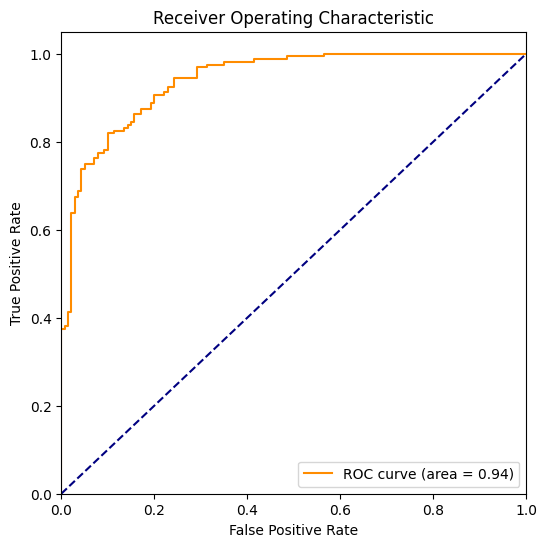

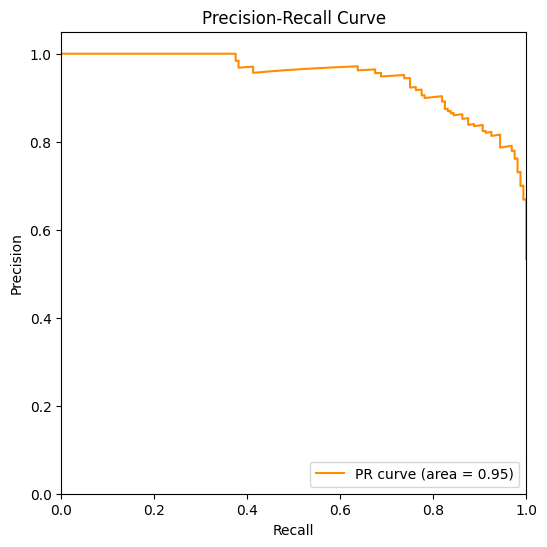

In [4]:
# Logistic Regression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_prob = lr.predict_proba(X_test)[:, 1]

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_prob = dt.predict_proba(X_test)[:, 1]

# Performance metrics
def print_metrics(y_test, pred, prob):
    print('Accuracy:', accuracy_score(y_test, pred))
    print('F1 Score:', f1_score(y_test, pred))
    print('ROC AUC:', roc_auc_score(y_test, prob))
    precision, recall, _ = precision_recall_curve(y_test, prob)
    print('PR AUC:', auc(recall, precision))

print("Logistic Regression:")
print_metrics(y_test, lr_pred, lr_prob)
print("\nDecision Tree:")
print_metrics(y_test, dt_pred, dt_prob)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, lr_prob)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, lr_prob))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, lr_prob)
plt.figure(figsize=(6,6))
plt.plot(recall, precision, color='darkorange', label='PR curve (area = %0.2f)' % auc(recall, precision))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()



### Imbalanced Data Set

Now, let's create an extremely imbalanced problem and show the difference between ROC-AUC and PR-AUC:

In [ ]:
X, y = make_classification(n_samples=10000, n_features=20, n_informative=2, n_redundant=10, n_classes=2, weights=[0.99], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Train logistic regression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_prob = lr.predict_proba(X_test)[:, 1]

print("Logistic Regression Performance:")
print_metrics(y_test, lr_pred, lr_prob)


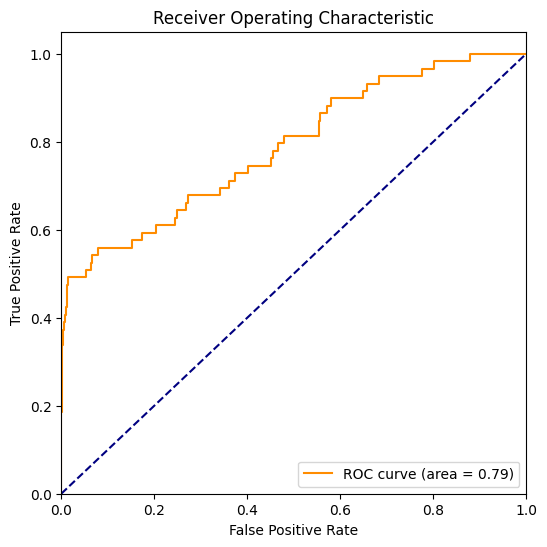

In [10]:

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, lr_prob)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, lr_prob))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [11]:
# Display Confusion Matrix for Logistic Regression Model
print("Confusion Matrix")
print("=============================================")

cm = confusion_matrix(y_test, lr_pred)
print('Confusion Matrix for Logistic Regression Model:')
print(cm)


Confusion Matrix
Confusion Matrix for Logistic Regression Model:
[[2940    1]
 [  49   10]]


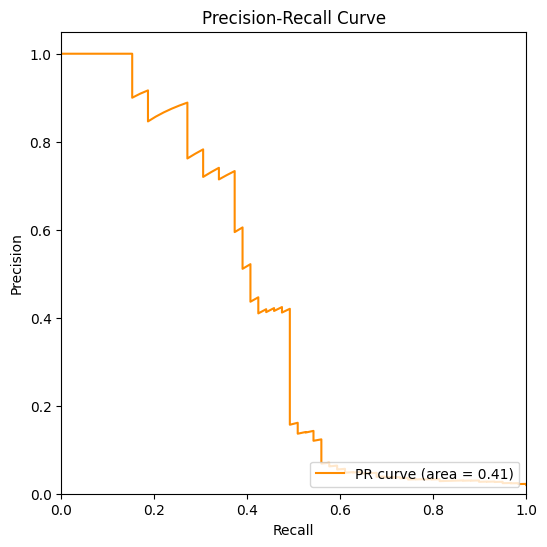

In [12]:


# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, lr_prob)
plt.figure(figsize=(6,6))
plt.plot(recall, precision, color='darkorange', label='PR curve (area = %0.2f)' % auc(recall, precision))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()


### Compare competing Models 

Finally, let's train two models with similar performances, one with 2000 features and one with 20 features.
We compare their performance 

In [ ]:
from sklearn.metrics import roc_curve

# With 2000 features
X, y = make_classification(n_samples=1000, n_features=2000, n_informative=2, n_redundant=10, n_classes=2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_prob = lr.predict_proba(X_test)[:, 1]

print("Logistic Regression with 2000 features:")
print_metrics(y_test, lr_pred, lr_prob)

fpr, tpr, _ = roc_curve(y_test, lr_prob)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, lr_prob))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

precision, recall, _ = precision_recall_curve(y_test, lr_prob)
plt.figure(figsize=(6,6))
plt.plot(recall, precision, color='darkorange', label='PR curve (area = %0.2f)' % auc(recall, precision))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(y_test, lr_pred)
print('Confusion Matrix:')
print(cm)

# With 20 features
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, n_classes=2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_prob = lr.predict_proba(X_test)[:, 1]

print("\nLogistic Regression with 20 features:")
print_metrics(y_test, lr_pred, lr_prob)

fpr, tpr, _ = roc_curve(y_test, lr_prob)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, lr_prob))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

precision, recall, _ = precision_recall_curve(y_test, lr_prob)
plt.figure(figsize=(6,6))
plt.plot(recall, precision, color='darkorange', label='PR curve (area = %0.2f)' % auc(recall, precision))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(y_test, lr_pred)
print('Confusion Matrix:')
print(cm)


### Your Task

1. Task 1 : For you the task is generate two classifiers. Use the breat cancer data set. 
    - Use LogisticRegression as classifier
    - Use 70% data for training and 30% data for testing
    - Train the first classifier with all features. Plot ROC-AUC, PR-AUC, F1 Score, confusion matrix.
    - Train the first classifier with top 5 features. Use REcursive feature elimination for selecting these features. Plot ROC-AUC, PR-AUC, F1 Score, confusion matrix.  


In [9]:
## Helper Function : plot the ROC and Precision-Recall curves and print the confusion matrix:

from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split


def plot_curves_and_cm(y_test, y_pred, y_prob):
    # Print Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:')
    print(cm)
    
    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.figure(figsize=(6,6))
    plt.plot(recall, precision, color='darkorange', label='PR curve (area = %0.2f)' % auc(recall, precision))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower right")
    plt.show()


# Performance metrics
def print_metrics(y_test, pred, prob):
    print('Accuracy:', accuracy_score(y_test, pred))
    print('F1 Score:', f1_score(y_test, pred))
    print('ROC AUC:', roc_auc_score(y_test, prob))
    precision, recall, _ = precision_recall_curve(y_test, prob)
    print('PR AUC:', auc(recall, precision))


In [ ]:
# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

In [ ]:


# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model with all features
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_prob = lr.predict_proba(X_test)[:, 1]

print("\nLogistic Regression with all features:")
print_metrics(y_test, lr_pred, lr_prob)

# Plot ROC and PR curves and print Confusion Matrix
plot_curves_and_cm(y_test, lr_pred, lr_prob)



In [ ]:
# Feature selection using RFE
rfe = RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=5)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Train a Logistic Regression model with 5 most informative features
lr_rfe = LogisticRegression(solver='liblinear')
lr_rfe.fit(X_train_rfe, y_train)
lr_rfe_pred = lr_rfe.predict(X_test_rfe)
lr_rfe_prob = lr_rfe.predict_proba(X_test_rfe)[:, 1]

print("\nLogistic Regression with 5 most informative features:")
print_metrics(y_test, lr_rfe_pred, lr_rfe_prob)

# Plot ROC and PR curves and print Confusion Matrix
plot_curves_and_cm(y_test, lr_rfe_pred, lr_rfe_prob)
